In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import pygmt

In [2]:
data = {
    "deployment_date": ["08-07-2024","08-07-2024","09-07-2024","11-07-2024","11-07-2024","12-07-2024",
"12-07-2024","13-07-2024","13-07-2024"],
    "deployment_time (UTC)": ["05:50","11:34","11:21","11:36","14:52","02:54","14:42","02:47","05:36"],
    "latitude" :[11.25, 11.25, 11.25, 10.83, 10.74, 10.4, 9.6, 8.74, 8.718],
    "longitude" : [72.53, 72.53, 72.53, 73.53, 73.71, 75.25, 75.92, 76.4, 76.504]
}

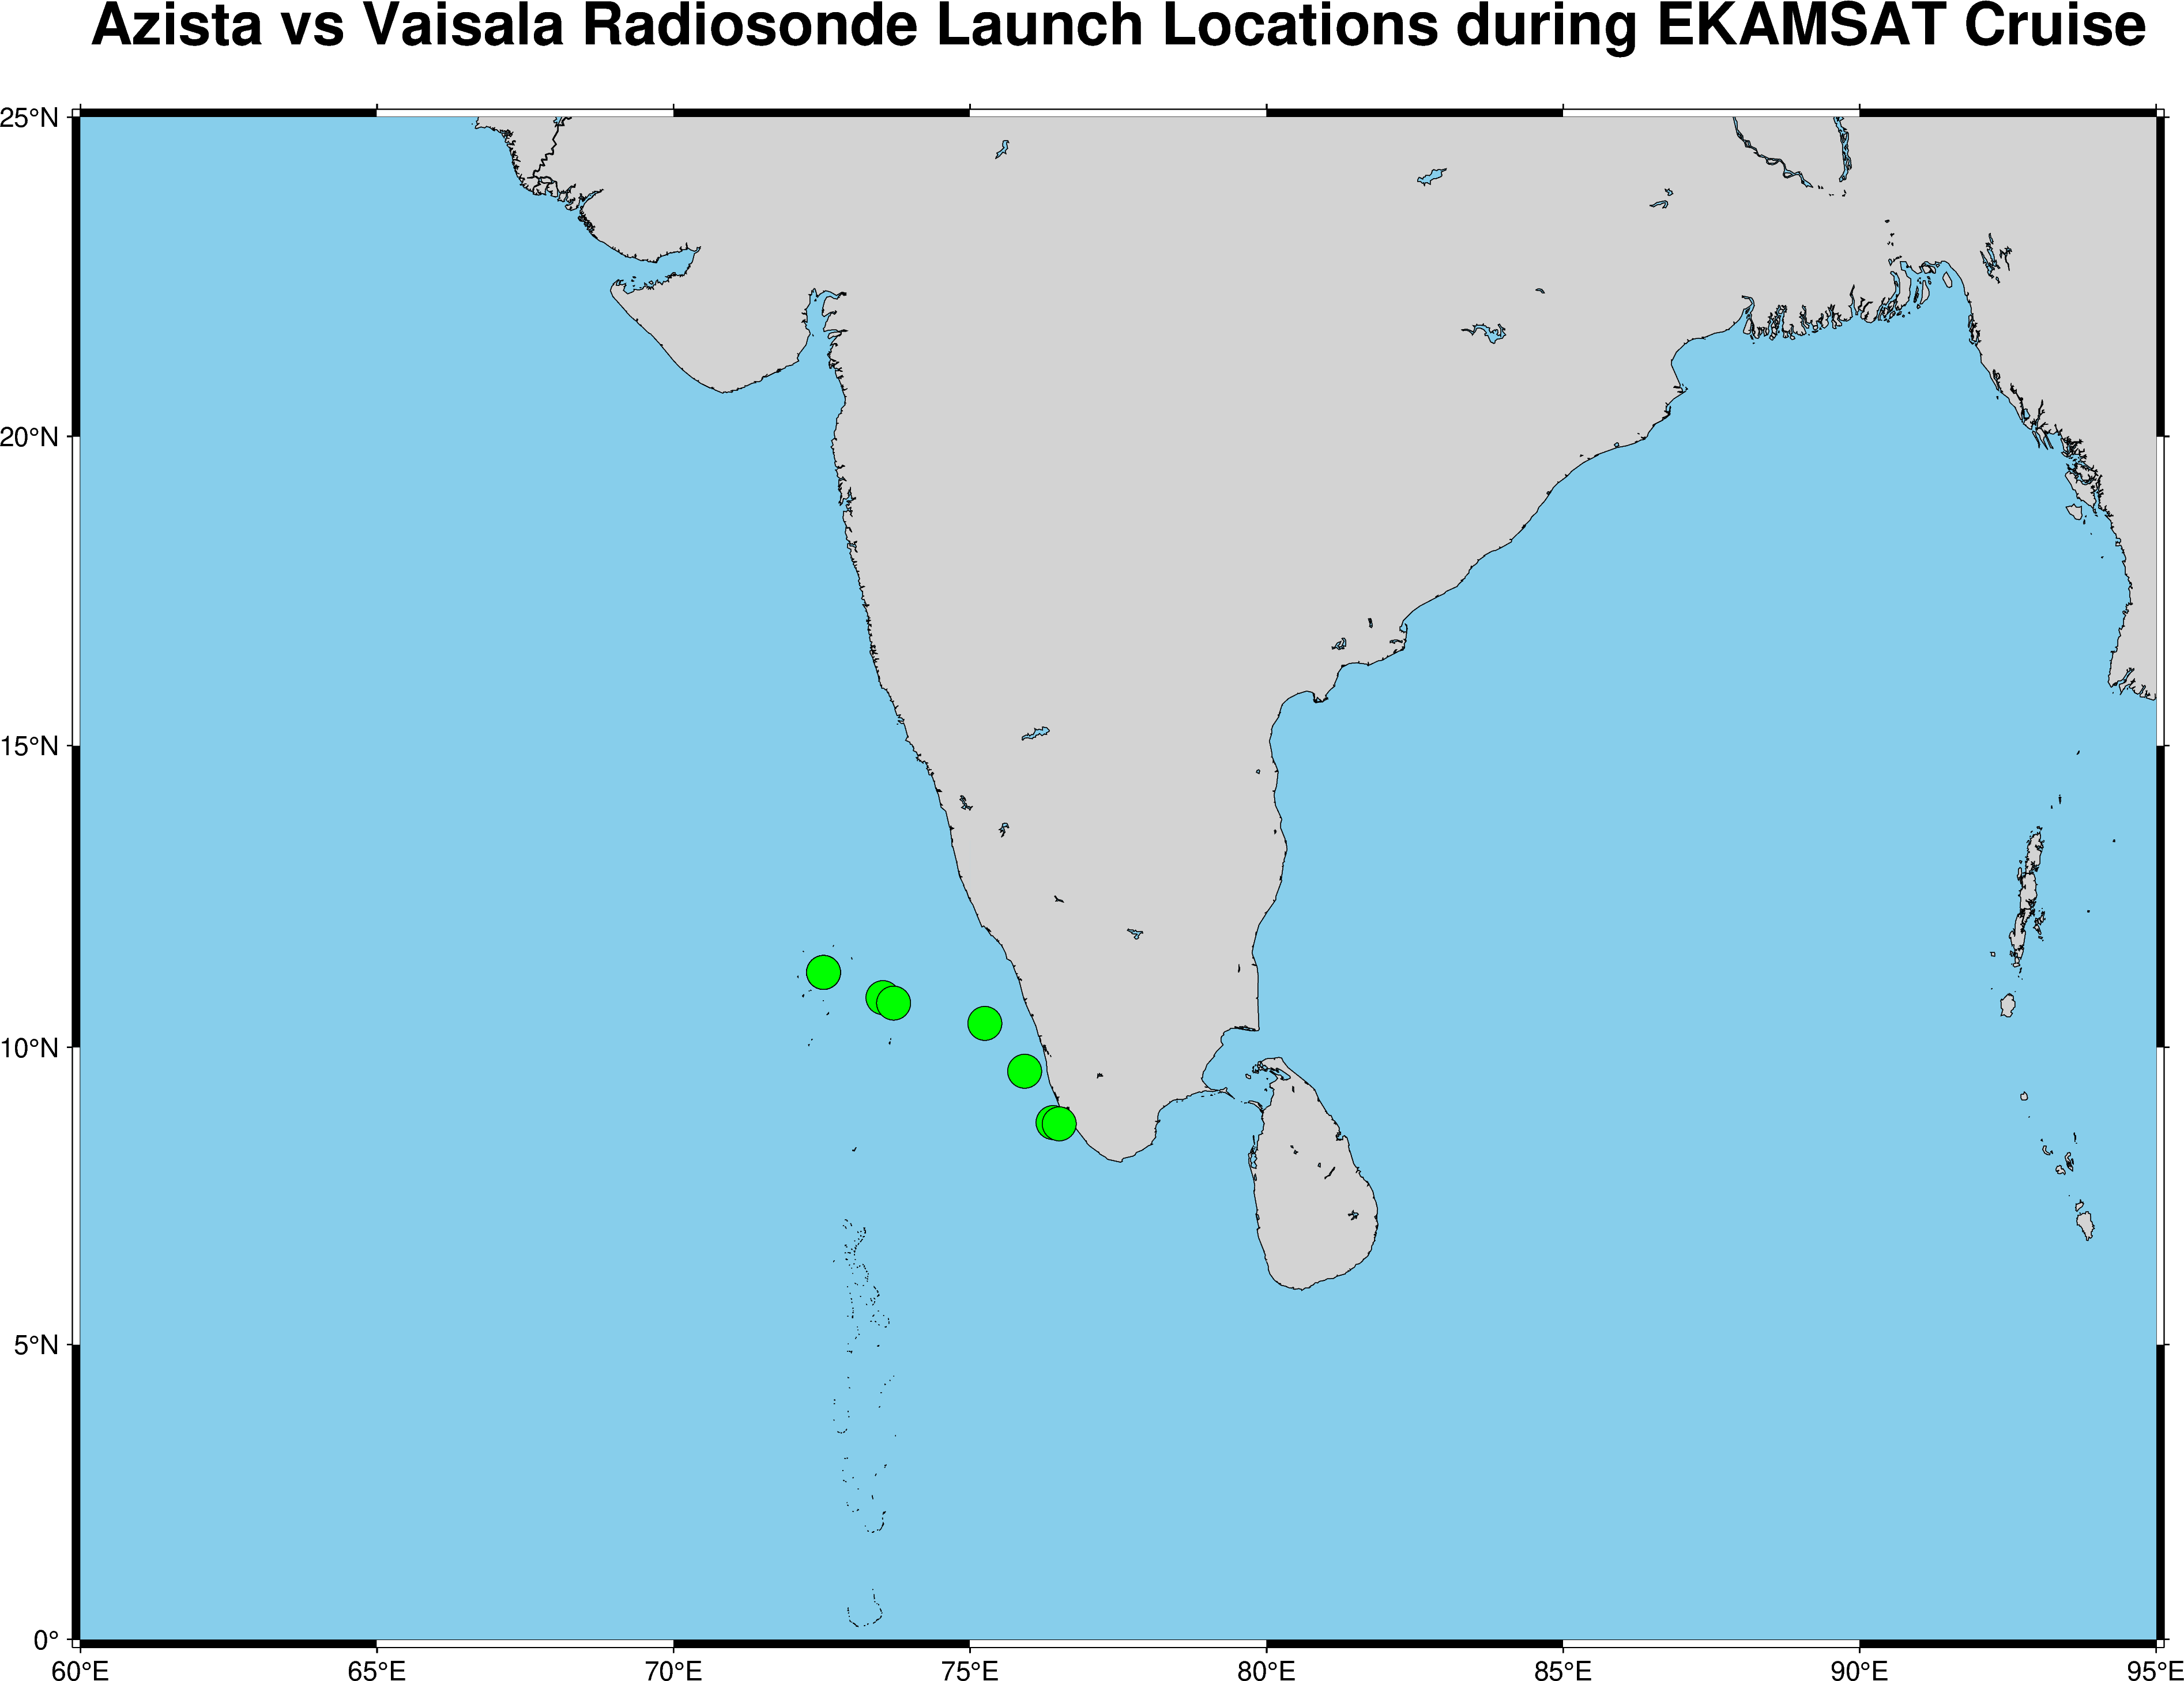

In [3]:
fig = pygmt.Figure()
region = [60,95,0,25]

fig.basemap(region = region, projection = "M12i",  frame = ["a", "+tAzista vs Vaisala Radiosonde Launch Locations during EKAMSAT Cruise \n June - July 2024"])
fig.coast(land="lightgrey", water = "skyblue", shorelines = True,)
fig.plot(x=data['longitude'], y=data['latitude'], style = "c0.5c", fill="green",pen="black")

fig.savefig("launch_locations.png")
fig.show()

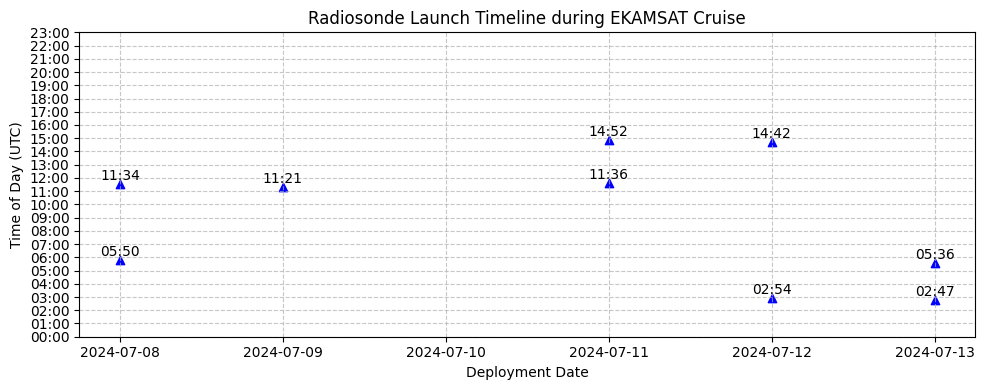

In [4]:
# Sample dictionary input

# data = {
#     "deployment_date": ["2024-07-08", "2024-07-09", "2024-07-10", "2024-07-11"],
#     "deployment_time": ["05:57", "06:01", "05:59", "06:05"]
# }

# Convert to DataFrame
df = pd.DataFrame(data)

# Combine date and time into datetime
df['datetime'] = pd.to_datetime(df['deployment_date'] + ' ' + df['deployment_time (UTC)'], dayfirst=True)

# Extract date and time separately for plotting
df['date'] = df['datetime'].dt.date
df['time_of_day'] = df['datetime'].dt.time


# Convert time_of_day to matplotlib-compatible float hours for y-axis
df['time_float'] = df['datetime'].dt.hour + df['datetime'].dt.minute / 60



# Plot
plt.figure(figsize=(10, 4))
plt.scatter(df['date'], df['time_float'], color='blue', marker='^')


# Format y-axis as time labels
yticks = range(0, 24)
yticklabels = [f"{h:02d}:00" for h in yticks]
plt.yticks(yticks, yticklabels)

# Annotate times
for i, row in df.iterrows():
    plt.text(row['date'] , row['time_float'] + 0.3, row['deployment_time (UTC)'], fontsize=10, ha='center')

# plt.xlabel("Deployment Date")
# plt.ylabel("Time of Day (UTC)")
# plt.title("Radiosonde Launch Timeline during EKAMSAT Cruise")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

plt.xlabel("Deployment Date")
plt.ylabel("Time of Day (UTC)")
plt.title("Radiosonde Launch Timeline during EKAMSAT Cruise")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("launch_time_1.png")
plt.show()


In [ ]:
print(df.iterrows)

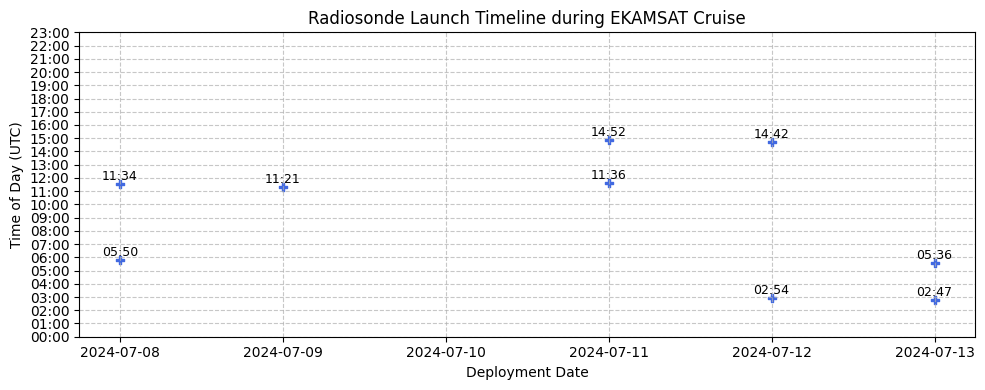

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Input dictionary with DD-MM-YYYY format
# data = {
#     "deployment_date": ["08-07-2024", "09-07-2024", "10-07-2024", "11-07-2024"],
#     "deployment_time": ["05:57", "06:01", "05:59", "06:05"]
# }

# Convert to DataFrame
df = pd.DataFrame(data)

# Combine date and time into datetime, specifying dayfirst=True
df['datetime'] = pd.to_datetime(df['deployment_date'] + ' ' + df['deployment_time (UTC)'], dayfirst=True)

# Extract date and time separately
df['date'] = df['datetime'].dt.date
df['time_float'] = df['datetime'].dt.hour + df['datetime'].dt.minute / 60

# Plot
plt.figure(figsize=(10, 4))
plt.scatter(df['date'], df['time_float'], color='royalblue', marker='P')

# Format y-axis to show time labels
yticks = range(0, 24)
yticklabels = [f"{h:02d}:00" for h in yticks]
plt.yticks(yticks, yticklabels)

# Annotate time labels on plot
for i, row in df.iterrows():
    plt.text(row['date'], row['time_float'] + 0.3, row['deployment_time (UTC)'], ha='center', fontsize=9)

plt.xlabel("Deployment Date")
plt.ylabel("Time of Day (UTC)")
plt.title("Radiosonde Launch Timeline during EKAMSAT Cruise")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("launch_time_2.png")
plt.show()


In [55]:
# Read CSV Data from file

df_vaisala = pd.read_csv("D:\\Data\\ekam-radiosonde-data\\data_analysis\\Vaisala_and_Azista\\vaisala_rs_launch_meta.csv")


In [56]:
df_vaisala.head()

,s.no,date,time_UTC,lat_deg,lon_deg,radiosonde_id,temp_C,hum_%,ws_(m/s),wd_deg,press_hPa,env_cond,Unnamed: 12
0,1,27-06-24,11:55,12.6,73.1,W1810571,29.1,65.0,9.25,350.0,NaN,Overcast,NaN
1,2,27-06-24,17:47,12.5,72.78,W1760204,29.0,69.0,11.35,330.0,NaN,overcast,NaN
2,3,28-06-24,00:00,12.57,72.33,W1760202,29.4,77.0,12.80,310.0,NaN,clear sky,NaN
3,4,28-06-24,02:45,13,72.45,NaN,29.2,78.0,9.40,248.0,NaN,NaN,NaN
4,5,28-06-24,06:00,12.6,72.27,W1760156,29.4,78.0,9.40,241.0,NaN,NaN,NaN


In [74]:

df_vaisala['date'] = pd.to_datetime(df_vaisala['date'], errors='coerce',dayfirst=True)        # Converts to datetime.date if only dates
df_vaisala['time'] = pd.to_datetime(df_vaisala['time_UTC'], errors='coerce').dt.time  # Converts to datetime.time
df_vaisala['latitude'] = df_vaisala['lat_deg']
df_vaisala['longitude'] = df_vaisala['lon_deg']

C:\Users\ravic\AppData\Local\Temp\ipykernel_23664\2266205866.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vaisala['time'] = pd.to_datetime(df_vaisala['time_UTC'], errors='coerce').dt.time  # Converts to datetime.time


In [79]:
df_vaisala.latitude.info

<bound method Series.info of 0       12.6
1       12.5
2      12.57
3         13
4       12.6
       ...  
126     8.49
127      8.3
128     8.14
129     7.99
130     7.99
Name: latitude, Length: 131, dtype: object>

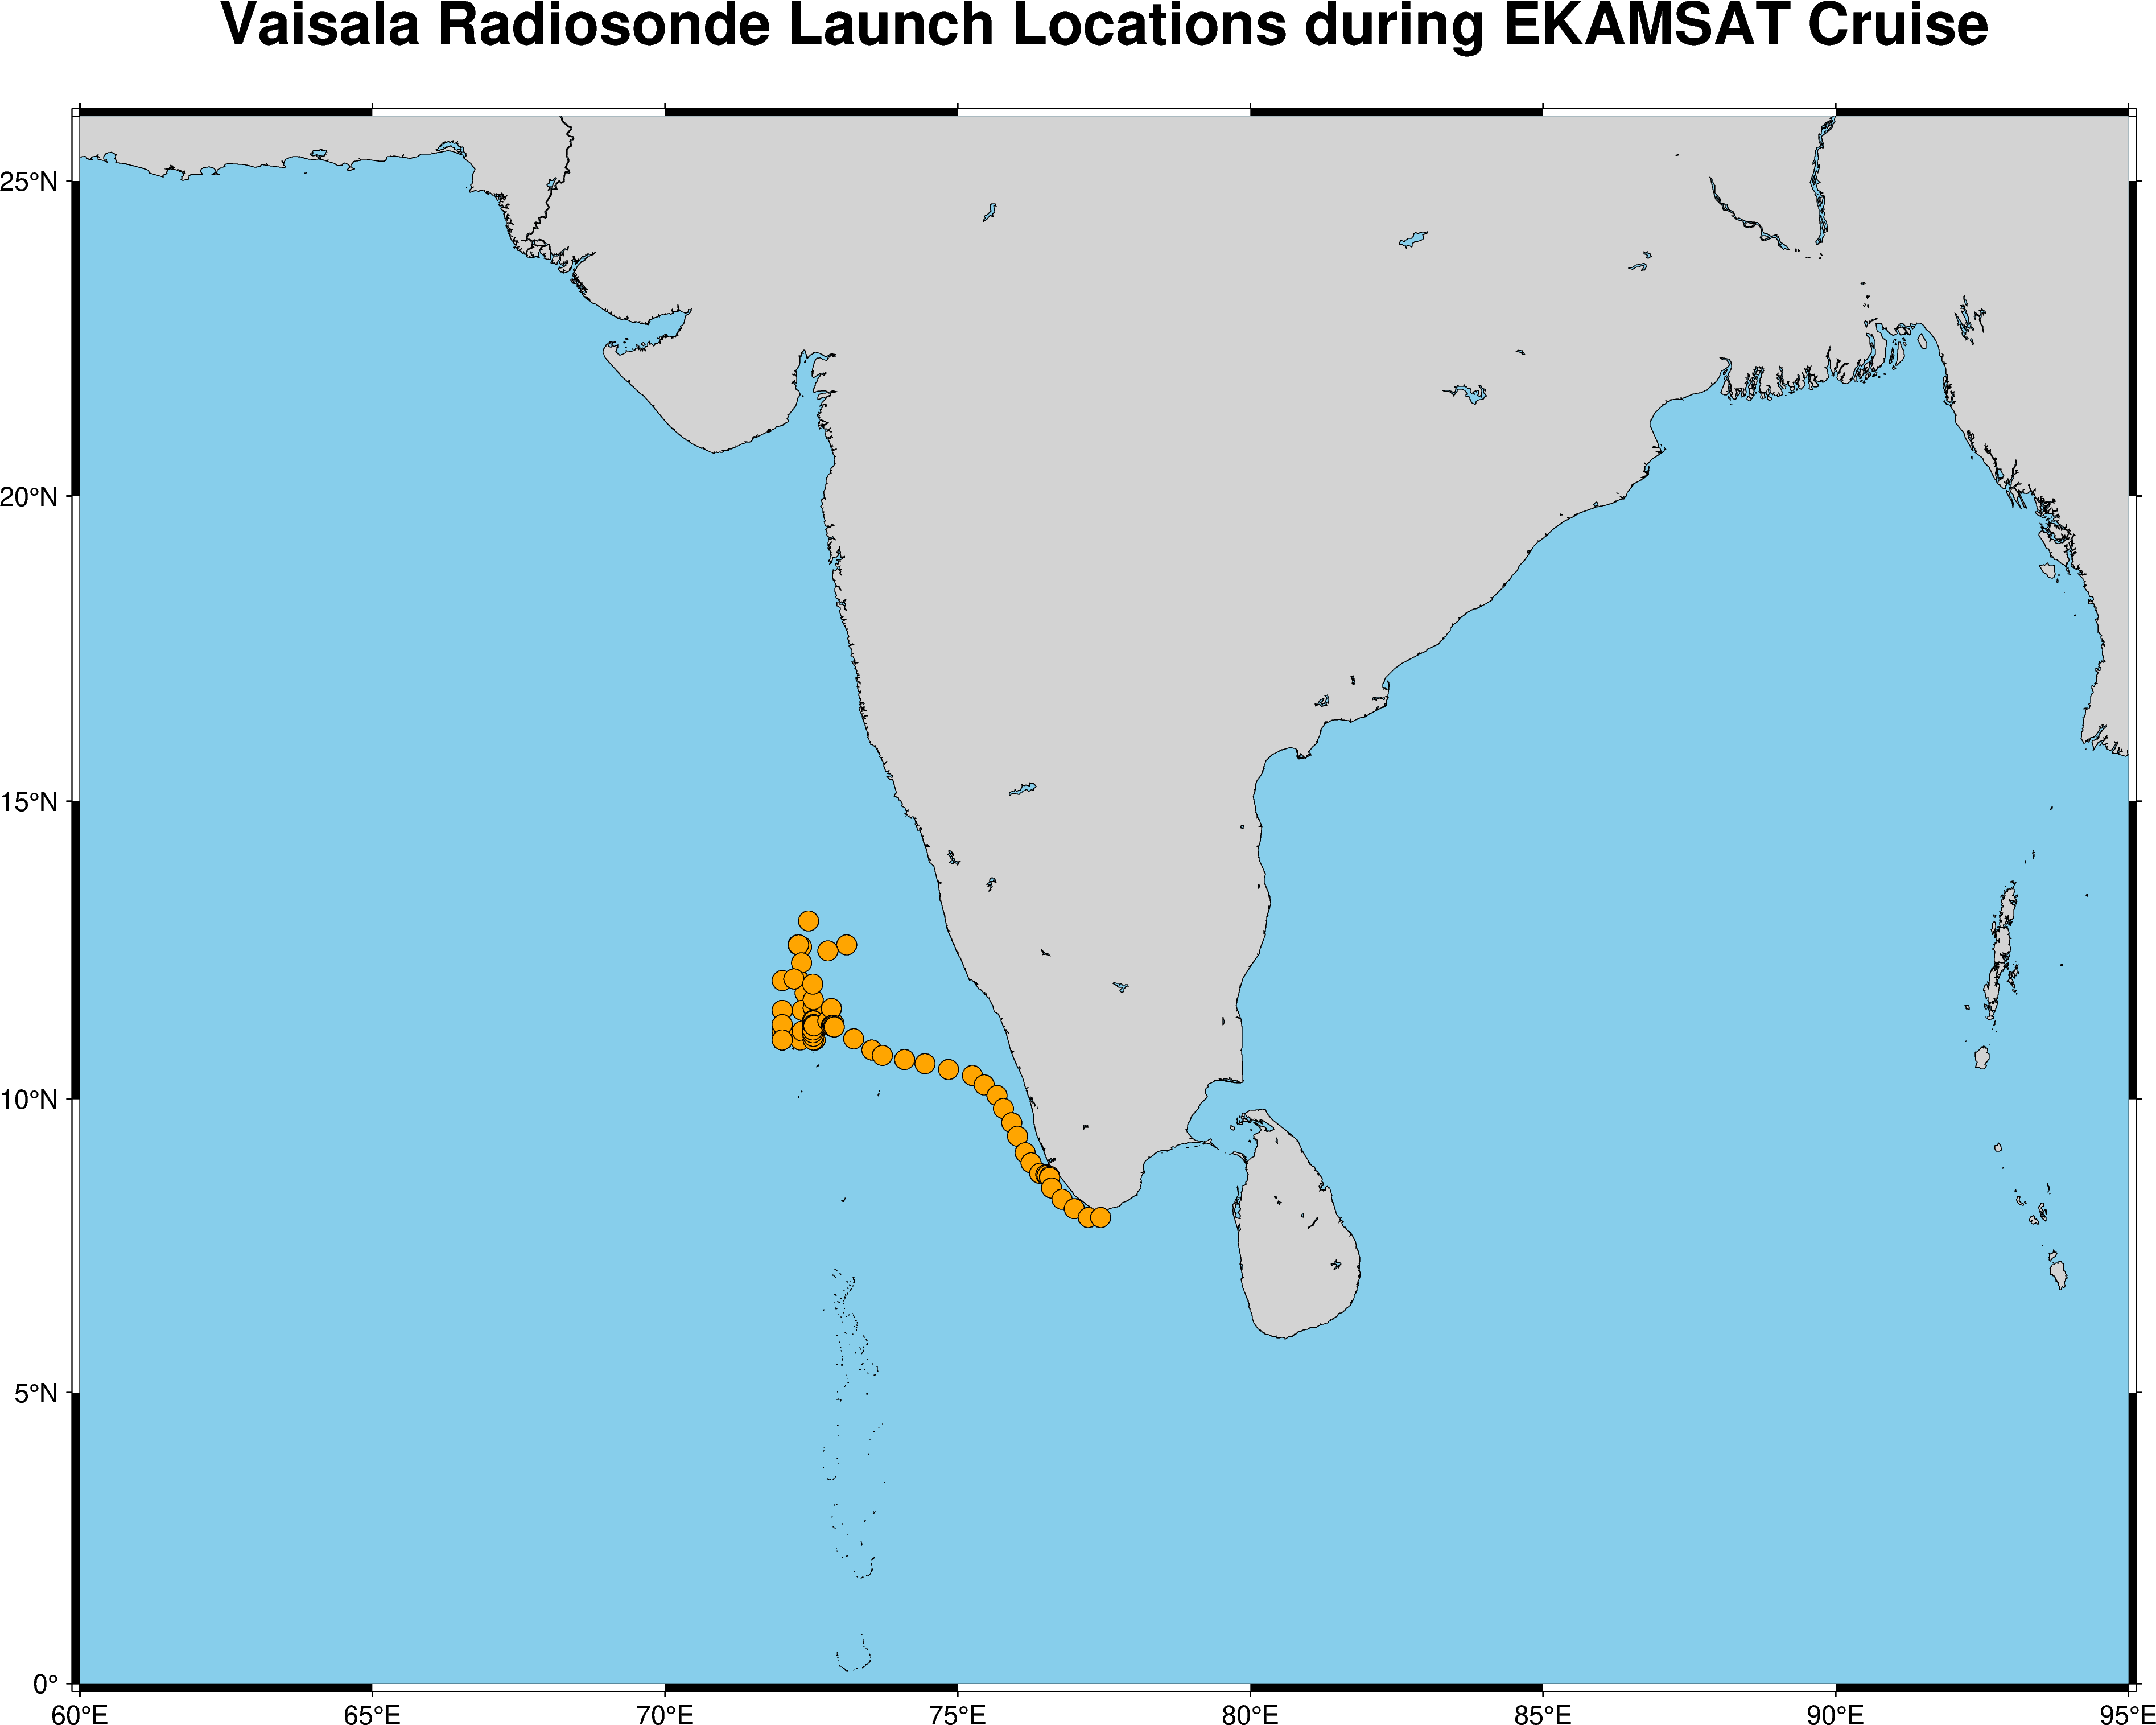

In [96]:
fig = pygmt.Figure()
region = [60,95,0,26]

fig.basemap(region = region, projection = "M12i",  frame = ["a", "+tVaisala Radiosonde Launch Locations during EKAMSAT Cruise"])
fig.coast(land="lightgrey", water = "skyblue", shorelines = True,)
fig.plot(x=df_vaisala.longitude, y=df_vaisala.latitude, style = "c0.3c", fill="orange",pen="black")

fig.savefig("launch_locations.png")
fig.show()

C:\Users\ravic\AppData\Local\Temp\ipykernel_23664\1803143288.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time_UTC'], dayfirst=True)


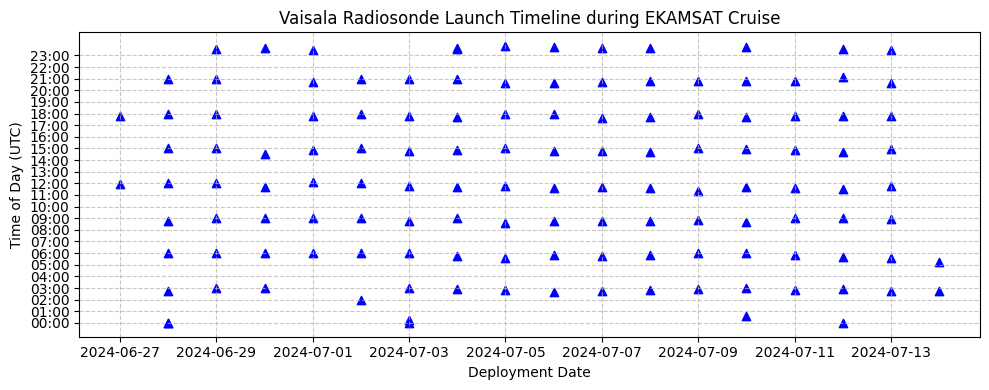

In [94]:
# Sample dictionary input

# data = {
#     "deployment_date": ["2024-07-08", "2024-07-09", "2024-07-10", "2024-07-11"],
#     "deployment_time": ["05:57", "06:01", "05:59", "06:05"]
# }

# Convert to DataFrame
path = "D:\\Data\\ekam-radiosonde-data\\data_analysis\\Vaisala_and_Azista\\vaisala_rs_launch_meta.csv"
df = pd.read_csv(path)

# Combine date and time into datetime
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time_UTC'], dayfirst=True)

# Extract date and time separately for plotting
df['date'] = df['datetime'].dt.date
df['time_of_day'] = df['datetime'].dt.time


# Convert time_of_day to matplotlib-compatible float hours for y-axis
df['time_float'] = df['datetime'].dt.hour + df['datetime'].dt.minute / 60



# Plot
plt.figure(figsize=(10, 4))
plt.scatter(df['date'], df['time_float'], color='blue', marker='^')


# Format y-axis as time labels
yticks = range(0, 24)
yticklabels = [f"{h:02d}:00" for h in yticks]
plt.yticks(yticks, yticklabels)

# Annotate times
# for i, row in df.iterrows():
#     plt.text(row['date'] , row['time_float'] + 0.3, row['time_UTC'], fontsize=10, ha='center')

# plt.xlabel("Deployment Date")
# plt.ylabel("Time of Day (UTC)")
# plt.title("Radiosonde Launch Timeline during EKAMSAT Cruise")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

plt.xlabel("Deployment Date")
plt.ylabel("Time of Day (UTC)")
plt.title("Vaisala Radiosonde Launch Timeline during EKAMSAT Cruise")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("launch_time_v2.png")
plt.show()


C:\Users\ravic\AppData\Local\Temp\ipykernel_10088\3878656045.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time_UTC'], dayfirst=True)


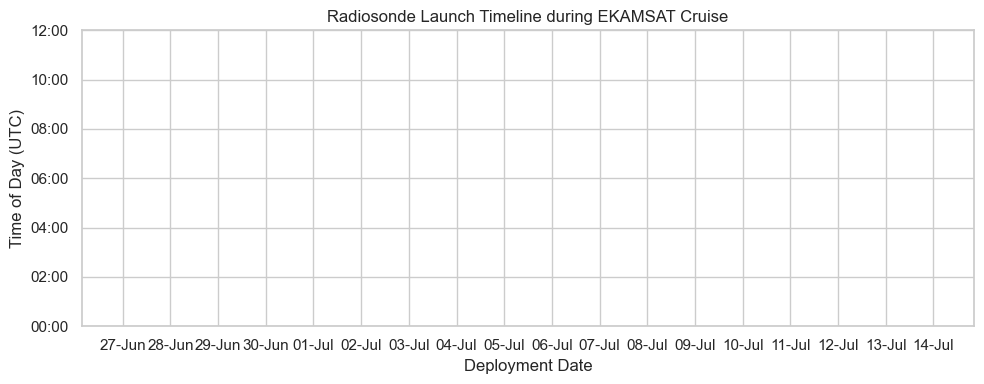

In [18]:
# NOT WORKING

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import seaborn as sns 


# Optional: better default style
sns.set(style="whitegrid")

# Sample data (you can replace with your actual dictionary)
# data = {
#     "deployment_date": ["08-07-2024", "09-07-2024", "10-07-2024", "11-07-2024"],
#     "deployment_time (UTC)": ["05:57", "06:01", "05:59", "06:05"]
# }

# # Convert to DataFrame
# df = pd.DataFrame(data)

path = "D:\\Data\\ekam-radiosonde-data\\data_analysis\\Vaisala_and_Azista\\vaisala_rs_launch_meta.csv"
df = pd.read_csv(path)

# Combine date and time into a full datetime object
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time_UTC'], dayfirst=True)

# Split into date and time again for plotting
df['date'] = df['datetime'].dt.date
df['time'] = pd.to_datetime(df['datetime']).dt.time  #format="%H:%M"
df['time_dt'] = pd.to_datetime(df['datetime']) # format="%H:%M"

# Plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plot with time on y-axis as datetime
ax.scatter(df['date'], df['time_dt'], color='royalblue', marker='^', s=100)

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Format y-axis to show HH:MM
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylim(pd.to_datetime("00:00", format="%H:%M"), pd.to_datetime("12:00", format="%H:%M"))

# Annotate time
for i, row in df.iterrows():
    ax.annotate(row['time_UTC'],
                (row['date'], row['time_dt']),
                textcoords="offset points",
                xytext=(0, 8),  # Vertical offset
                ha='center',
                fontsize=9)

# Labels and Title
ax.set_xlabel("Deployment Date")
ax.set_ylabel("Time of Day (UTC)")
ax.set_title("Radiosonde Launch Timeline during EKAMSAT Cruise")

plt.tight_layout()
plt.savefig("launch_time_improved.png")
plt.show()
